
Valores codificados para 'orcamento':
  0 -> Alto
  1 -> Baixo
  2 -> Médio

Valores codificados para 'preferencia':
  0 -> Fast Food
  1 -> Italiano
  2 -> Japonês

Valores codificados para 'distancia':
  0 -> Longe
  1 -> Próximo

Valores codificados para 'recomendacao':
  0 -> Não
  1 -> Sim


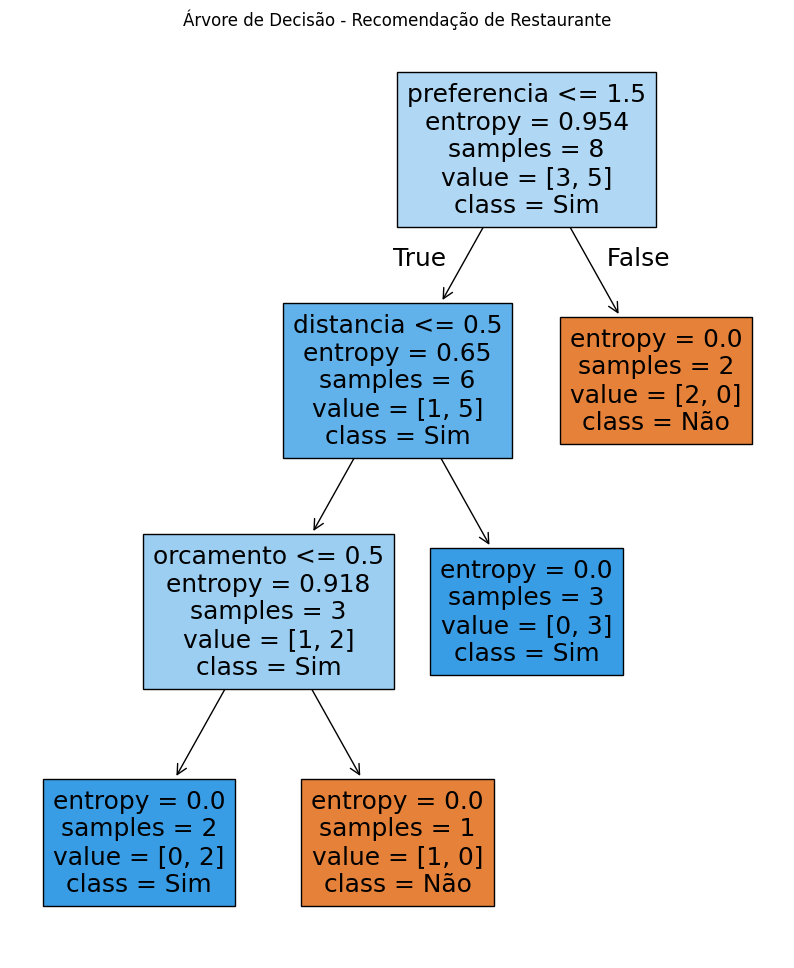

Regras da Árvore de Decisão (com categorias originais):
|--- preferencia = Italiano
|   |--- distancia = Longe
|   |   |--- orcamento = Alto
|   |   |   |--- class: Sim
|   |   |--- orcamento = Alto
|   |   |   |--- class: Não
|   |--- distancia = Longe
|   |   |--- class: Sim
|--- preferencia = Italiano
|   |--- class: Não



In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
from sklearn import tree
import re

dados = {
    'orcamento': ['Baixo', 'Médio', 'Médio', 'Alto', 'Baixo', 'Médio', 'Alto', 'Baixo'],
    'preferencia': ['Fast Food', 'Italiano', 'Japonês', 'Italiano', 'Japonês', 'Fast Food', 'Fast Food', 'Italiano'],
    'distancia': ['Próximo', 'Próximo', 'Longe', 'Longe', 'Próximo', 'Próximo', 'Longe', 'Longe'],
    'recomendacao': ['Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não']
}

df = pd.DataFrame(dados)

label_encoders = {}
for coluna in df.columns:
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    label_encoders[coluna] = le

for coluna, encoder in label_encoders.items():
    print(f"\nValores codificados para '{coluna}':")
    for i, classe in enumerate(encoder.classes_):
        print(f"  {i} -> {classe}")


X = df[['orcamento', 'preferencia', 'distancia']]
y = df['recomendacao']


clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X, y)


plt.figure(figsize=(10, 12))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['recomendacao'].classes_, filled=True)
plt.title("Árvore de Decisão - Recomendação de Restaurante")
plt.show()


def decode_rules(rules_text, label_encoders):
    decoded_rules = rules_text
    for feature in label_encoders:
        classes = label_encoders[feature].classes_
        for i, cls in enumerate(classes):
            decoded_rules = re.sub(rf'{feature} <= {i}\.50', f'{feature} = {cls}', decoded_rules)
            decoded_rules = re.sub(rf'{feature} >  {i}\.50', f'{feature} = {cls}', decoded_rules)
            decoded_rules = re.sub(rf'{feature} <= {i}\.00', f'{feature} = {cls}', decoded_rules)
            decoded_rules = re.sub(rf'{feature} >  {i}\.00', f'{feature} != {cls}', decoded_rules)
    for i, cls in enumerate(label_encoders['recomendacao'].classes_):
        decoded_rules = decoded_rules.replace(f'class: {i}', f'class: {cls}')
    return decoded_rules


regras = export_text(clf, feature_names=list(X.columns))
regras_decodificadas = decode_rules(regras, label_encoders)
print("Regras da Árvore de Decisão (com categorias originais):")
print(regras_decodificadas)